In [1]:
#TP3

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

EPH2025 = pd.read_excel(r"C:\Users\Isabella\Downloads\usu_individual_T125.xlsx")

EPH2005 = pd.read_stata(r"C:\Users\Isabella\Downloads\Individual_t105.dta")

In [3]:
# Como nombraron distinto a las regiones en los dos años, vemos como se llaman así filtramos bien
print(EPH2025['REGION'].unique())
#está como 43

# Lo mismo para 2005
print(EPH2005['region'].unique())
#está como Pampeana

#nos aseguramos que estén las dos en minúsculas para poder unir las bases
EPH2025.columns = EPH2025.columns.str.lower()
EPH2005.columns = EPH2005.columns.str.lower()

#nos quedamos solo con pampeana
# Filtrar Región Pampeana en 2005
EPH2005_pampeana = EPH2005[EPH2005['region'] == 'Pampeana'].copy()

# Filtrar Región Pampeana en 2025 (código 43)
EPH2025_pampeana = EPH2025[EPH2025['region'] == 43].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# Unimos pampeana de las dos años
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

[43 41 42 40 44  1]
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [4]:
#guardamos las variables con las que nos quedamos en esta lista
variables = [
   "codusu","region", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",  
    "ch15", "itf",  "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

EPH2005_filtrado = EPH2005[variables]

EPH2025_filtrado = EPH2025[variables]

In [5]:
# ahora, para arreglar y que tengan el mismo formato en ambas bases de dato, nos fijamos con la función .unique() en cada
#variable para armar un diccionari para cada una variable y después cambiar su valor para que esten iguales
mapping_ch04 = {
    'Varón': 1,
    'Mujer': 2
}

mapping_ch07 = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': pd.NA,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
mapping_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./Nr.': pd.NA
}
mapping_estado = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
mapping_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7,
    0.0: 0
}
mapping_ch15 = {
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch09 = {
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3,
    'Ns./Nr.': pd.NA
}
mapping_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}
mapping_cat_ocup = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    0.0 : 0
}

def limpiar_edad(x):
    if isinstance(x, str):
        if 'Menos de 1' in x:
            return 0
        elif '98' in x:
            return 99
        else:
            return pd.NA
    else:
        return int(x)

EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
EPH2005_filtrado.loc[:, 'ch07'] = EPH2005_filtrado['ch07'].map(mapping_ch07).astype('Int64')
EPH2005_filtrado.loc[:, 'ch08'] = EPH2005_filtrado['ch08'].map(mapping_ch08).astype('Int64')
EPH2005_filtrado.loc[:, 'nivel_ed'] = EPH2005_filtrado['nivel_ed'].map(mapping_nivel_ed).astype('Int64')
EPH2005_filtrado.loc[:, 'estado'] = EPH2005_filtrado['estado'].map(mapping_estado).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_inac'] = EPH2005_filtrado['cat_inac'].map(mapping_cat_inac).astype('Int64')
EPH2005_filtrado.loc[:, 'ch15'] = EPH2005_filtrado['ch15'].map(mapping_ch15).astype('Int64')
EPH2005_filtrado.loc[:, 'ch09'] = EPH2005_filtrado['ch09'].map(mapping_ch09).astype('Int64')
EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')

#Decidimos no considerar los 9 como Nan. Los consideramos una respuesta más.

C:\Users\Isabella\AppData\Local\Temp\ipykernel_16156\724900425.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
 ...
 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_16156\724900425.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[80, 26, 27,  0, 71, 54, 54, 27, 20, 18,
 ...
  8,  5,  3, 41, 44, 16, 12, 43, 26,  5]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
C:\Users\

In [6]:
# Columnas categóricas que ya son números significativos
categ_numericas = ["ch04","ch03","ch06","ch07","ch08","ch09","ch15",
                   "nivel_ed","estado","cat_inac","cat_ocup"]

# Columnas float
float_cols = ["ipcf","itf","p47t","p21"]

# Convertimos categóricas a Int64
for col in categ_numericas:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')

# Convertimos tambie´n a los floats
for col in float_cols:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)

#Ahora vemos que quedaron iguales en tipos de datos, menos región que vamos a 
#quedarnos solo con región pampeana antes de unir las bases

C:\Users\Isabella\AppData\Local\Temp\ipykernel_16156\3681759390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_16156\3681759390.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_16156\3681759390.py:18: SettingWithCopyWarn

In [7]:
# Antes de unir las bases, vamos a chequear valores negativos 

# Definimos la lista exacta de variables que quieres revisar.
variables_a_revisar = ['ipcf', 'ch15', 'itf', 'p47t', 'p21']

print("--- Conteo de valores negativos en EPH 2005 ---")
# Filtramos el DataFrame para quedarnos solo con las filas donde cualquier
# valor en las columnas especificadas es negativo, y luego contamos.
negativos_2005 = EPH2005_filtrado[variables_a_revisar][EPH2005_filtrado[variables_a_revisar] < 0].count()
print(negativos_2005)


print("\n--- Conteo de valores negativos en EPH 2025 ---")
# Repetimos el mismo proceso para la base de datos de 2025.
negativos_2025 = EPH2025_filtrado[variables_a_revisar][EPH2025_filtrado[variables_a_revisar] < 0].count()
print(negativos_2025)


--- Conteo de valores negativos en EPH 2005 ---
ipcf    0
ch15    0
itf     0
p47t    0
p21     0
dtype: int64

--- Conteo de valores negativos en EPH 2025 ---
ipcf       0
ch15       0
itf        0
p47t    5405
p21     3839
dtype: int64


In [8]:
variables = [
    "codusu", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",
    "ch15", "itf", "ch03", "p47t", "p21", "pp3e_tot", "pp3f_tot"
]

# Para 2005: solo filtramos por región Pampeana y seleccionamos las variables.
# No se limpian negativos porque, como se ve en el codigo anterior, para el año 2005, no hay.
EPH2005_pampeana = EPH2005_filtrado.loc[
    EPH2005_filtrado['region'] == "Pampeana",
    variables
].copy()

# Para 2025: aplicamos TODOS los filtros a la vez usando el operador '&' (y).
# Condición 1: La región debe ser 43 (Pampeana).
# Condición 2: El ingreso p47t debe ser mayor o igual a 0.
# Condición 3: El ingreso p21 debe ser mayor o igual a 0.
EPH2025_pampeana = EPH2025_filtrado.loc[
    (EPH2025_filtrado['region'] == 43) &     
    (EPH2025_filtrado['p47t'] >= 0) &   
    (EPH2025_filtrado['p21'] >= 0),           
    variables
].copy()

# Ahora sí, agregamos año y unimos
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

In [9]:
# Contar cuántas personas respondieron estado respondieron == 0 por año
respondieron_estado0 = EPH_total[EPH_total["estado"] == 0].groupby("anio").size()

print("Cantidad de personas que no respondieron su condición de actividad por año:")
print(respondieron_estado0)

Cantidad de personas que no respondieron su condición de actividad por año:
anio
2005    24
dtype: int64


In [10]:
# Aca lo que pasó fue que nos dimos cuenta que no aparecían los estado == 0 del 2025. Nos fijamos en donde exactamente habíamos perdido esos datos
conteo_inicial_2025 = (EPH2025_filtrado['estado'] == 0).sum()

#efectivamentem antes de unir las bases de datos habían 75 personas con estado == 0
print(f"En el DataFrame 'EPH2025_filtrado' original, hay {conteo_inicial_2025} filas con estado == 0.")

En el DataFrame 'EPH2025_filtrado' original, hay 75 filas con estado == 0.


In [11]:
# Para verificar, creamos un data frame con estas variables
df_estado0_2025 = EPH2025_filtrado[EPH2025_filtrado['estado'] == 0]

# De esas 75, ¿cuántas son pampeanas?
filas_region_ok = (df_estado0_2025['region'] == 43).sum()
#11 eran pampeanas

# Prueba 2: ¿Cuántas de estas 75 filas tienen un ingreso p47t >= 0?
filas_p47t_ok = (df_estado0_2025['p47t'] >= 0).sum()
#NINGUNA tenía el p47t (monto total de ingreso individual percibido en el mes de referencia) <= 0
#entonces cuando quitamos estos sujetos, los perdimos de nuestra pase de datos, pero eran 11 en definitiva

# Prueba 3: ¿Cuántas de estas 75 filas tienen un ingreso p21 >= 0?
filas_p21_ok = (df_estado0_2025['p21'] >= 0).sum()
#Todas tenían p21 (monto de ingreso de la ocupación principal)>= 0

In [12]:
# Vemos itf > 0
respondieron = EPH_total[EPH_total['itf'] > 0].copy()
# Vemos itf = 0 (es decir, no respondieron)
norespondieron = EPH_total[EPH_total['itf'] == 0].copy()
print("Número de observaciones que respondieron ITF:", respondieron.shape[0])
print("Número de observaciones que no respondieron ITF:", norespondieron.shape[0])

Número de observaciones que respondieron ITF: 23821
Número de observaciones que no respondieron ITF: 2528


In [13]:
# Separar respondieron por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# Separar norespondieron por año
norespondieron_2005 = norespondieron[norespondieron['anio'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()

# Revisar dimensiones
print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)

Respondieron 2005: (14481, 19)
Respondieron 2025: (9340, 19)
No respondieron 2005: (170, 19)
No respondieron 2025: (2358, 19)


In [14]:
# Cargamos la tabla, si no la encuentra nos dice que no se encontró (el try/except)
try:
 df_equiv = pd.read_excel(r"C:\Users\Isabella\Downloads\tabla_adulto_equiv.xlsx", skiprows=4, nrows=23)
except FileNotFoundError:
    print("Error: El archivo 'tabla_adulto_equiv.xlsx' no se encontró. Revisa la ruta.")
    # Si usas Jupyter o Google Colab, es mejor salir de la celda si hay error.
    # Si es un script, podrías usar exit()
    raise

# Limpiamos y preparamos la tabla con las columnas que nos piden. Nos fijemos que todo tenga el formato correcto
df_equiv.columns = ['edad_str', 'Mujeres', 'Varones']
df_equiv_long = pd.melt(df_equiv, id_vars='edad_str', value_vars=['Mujeres', 'Varones'],
                        var_name='sexo_str', value_name='adulto_equiv')
df_equiv_long['ch04'] = df_equiv_long['sexo_str'].map({'Varones': 1, 'Mujeres': 2}).astype(int)
df_equiv_long['ch06'] = df_equiv_long['edad_str'].str.extract('(\d+)').astype(int)
df_equiv_long.loc[df_equiv_long['edad_str'] == 'Menor de 1 año', 'ch06'] = 0
df_equiv_final = df_equiv_long[['ch04', 'ch06', 'adulto_equiv']].dropna().sort_values(by=['ch04', 'ch06'])

# Preparamos el data frame respondieorn
# Creamos la base con ITF > 0 a partir de tu EPH_total
# Esto filtra los hogares que no informaron ingresos.
respondieron = EPH_total[EPH_total['itf'] > 0].copy()

# Nos aseguramos de que no haya nulos en las columnas clave para el cálculo y de que tengan el tipo de dato correcto.
columnas_clave = ['codusu', 'ch06', 'ch04', 'itf']
respondieron = respondieron.dropna(subset=columnas_clave)
respondieron['ch06'] = respondieron['ch06'].astype(int)
respondieron['ch04'] = respondieron['ch04'].astype(int)

# asignamos el adult equivs a cada persona
# Función de búsqueda que encuentra el valor de adulto equivalente
# para cada persona según su sexo y rango de edad.
def obtener_adulto_equiv(fila, tabla_equivalencias):
    sexo_persona = fila['ch04']
    edad_persona = fila['ch06']
    
    # Filtramos la tabla de equivalencias por el sexo de la persona
    tabla_sexo = tabla_equivalencias[tabla_equivalencias['ch04'] == sexo_persona]
    
    # Encuentra la fila correspondiente al rango de edad
    # Se toma el último valor de edad que sea menor o igual a la edad de la persona
    fila_equivalencia = tabla_sexo[tabla_sexo['ch06'] <= edad_persona]
    
    if not fila_equivalencia.empty:
        return fila_equivalencia['adulto_equiv'].iloc[-1]
    else:
        # Si no lo encuentra (por ej. edad negativa), devuelve NaN
        return np.nan

# Aplicamos la función a cada fila del DataFrame
respondieron['adulto_equiv'] = respondieron.apply(
    obtener_adulto_equiv, 
    axis=1, 
    tabla_equivalencias=df_equiv_final
)
# Agrupamos hogar y ad_equiv
# Usamos groupby con 'anio' y 'codusu' para identificar  cada hogar.
# '.transform('sum')' calcula la suma de 'adulto_equiv' para cada grupo (hogar)
# y luego asigna ese mismo valor total a cada miembro del hogar.

print("\nAgrupando por hogar y calculando 'ad_equiv_hogar'...")
respondieron['ad_equiv_hogar'] = respondieron.groupby(['anio', 'codusu'])['adulto_equiv'].transform('sum')
print("¡Cálculo de 'ad_equiv_hogar' completado!")


#  Vemos los primeros 10 de la tabla, seleccionando columnas relevantes.
# Deberías ver que las personas con el mismo 'codusu' y 'anio' tienen el mismo valor en 'ad_equiv_hogar'.
print(respondieron[['anio', 'codusu', 'ch04', 'ch06', 'adulto_equiv', 'ad_equiv_hogar']].head(10))


Agrupando por hogar y calculando 'ad_equiv_hogar'...
¡Cálculo de 'ad_equiv_hogar' completado!
   anio    codusu  ch04  ch06  adulto_equiv  ad_equiv_hogar
0  2005  125082       1    28          1.02            2.34
1  2005  125082       2    30          0.77            2.34
2  2005  125082       1     4          0.55            2.34
3  2005  125283       1    66          0.83            3.63
4  2005  125283       2    60          0.76            3.63
5  2005  125283       1    29          1.02            3.63
6  2005  125283       1    26          1.02            3.63
7  2005  125409       1    33          1.00            2.13
8  2005  125409       2    25          0.76            2.13
9  2005  125409       2     1          0.37            2.13


In [15]:
# Definimos valores de la CBT
# Guardamos los valores de la canasta en variables para que el código sea más claro.
cbt_2005 = 205.07
cbt_2025 = 365177

# Creamos columna ingreso necesario
# Usamos np.where para aplicar un cálculo condicional basado en el año.
print("Calculando el ingreso necesario para cada hogar...")

respondieron['ingreso_necesario'] = np.where(
    respondieron['anio'] == 2005,                          
    respondieron['ad_equiv_hogar'] * cbt_2005,               
    respondieron['ad_equiv_hogar'] * cbt_2025                 
)

# Ejemplo para el año 2005
print(respondieron[respondieron['anio'] == 2005][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

# Ejemplo para el año 2025
print(respondieron[respondieron['anio'] == 2025][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

Calculando el ingreso necesario para cada hogar...
   anio  ad_equiv_hogar  ingreso_necesario
0  2005            2.34           479.8638
1  2005            2.34           479.8638
2  2005            2.34           479.8638
3  2005            3.63           744.4041
4  2005            3.63           744.4041
       anio  ad_equiv_hogar  ingreso_necesario
14651  2025            2.99         1091879.23
14652  2025            2.99         1091879.23
14653  2025            2.99         1091879.23
14654  2025            2.99         1091879.23
14655  2025            2.12          774175.24


In [16]:
#Creamos columna pobe
# Al igual que en el inciso anterior usamos np.wherepara crear una columna basandonos en una condición 
# Condición: si el ingreso del hogar ('itf') es menor que su 'ingreso_necesario'.
# Valor si es verdadero: 1 (es pobre)
# Valor si es falso: 0 (no es pobre)

print("Creando la columna 'pobre'...")
respondieron['pobre'] = np.where(
    respondieron['itf'] < respondieron['ingreso_necesario'], 
    1, 
    0
)
print("¡Columna 'pobre' creada!")


# Calculamos cantidad y porcentaje de pobres
# Agrupamos el DataFrame por la columna 'anio'.
# Usamos .agg() para realizar múltiples cálculos a la vez sobre la columna "pobre":
#   - '"sum"nos da el total de pobres (porque suma todos los 1s).
#   - "count" nos da el total de personas en la muestra para ese año.

analisis_pobreza = respondieron.groupby('anio')['pobre'].agg(
    Cantidad_Pobres='sum', 
    Total_Personas='count'
)

# Calculamos el porcentaje dividiendo la cantidad de pobres por el total y multiplicando por 100
analisis_pobreza['Porcentaje_Pobreza'] = (analisis_pobreza['Cantidad_Pobres'] / analisis_pobreza['Total_Personas']) * 100


# Resultados
print(analisis_pobreza)
print(" Verificación de la columna 'pobre' (primeras 10 filas)")
print(respondieron[['anio', 'itf', 'ingreso_necesario', 'pobre']].head(10))

Creando la columna 'pobre'...
¡Columna 'pobre' creada!
      Cantidad_Pobres  Total_Personas  Porcentaje_Pobreza
anio                                                     
2005             4264           14481           29.445480
2025             3256            9340           34.860814
 Verificación de la columna 'pobre' (primeras 10 filas)
   anio     itf  ingreso_necesario  pobre
0  2005   840.0           479.8638      0
1  2005   840.0           479.8638      0
2  2005   840.0           479.8638      0
3  2005  4300.0           744.4041      0
4  2005  4300.0           744.4041      0
5  2005  4300.0           744.4041      0
6  2005  4300.0           744.4041      0
7  2005  1200.0           436.7991      0
8  2005  1200.0           436.7991      0
9  2005  1200.0           436.7991      0


In [17]:
#COMIENZO DEL TP3

In [18]:
#var independientes
X_vars = [
    'ch06', 'nivel_ed', 'estado', 'cat_ocup',
    'ch04', 'ch03', 'ch07', 'ch08', 'ch09', 'cat_inac', 'ch15'
]

# var dependiente
y_var = 'pobre'

# Semilla 
RANDOM_STATE = 444

# separamos base por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# usamos split
def prepare_data_split(df, X_vars, y_var, rs):
    
    X = df[X_vars].copy()
    y = df[y_var].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=rs, stratify=y
    )
    
#Agregamos columna 
    X_train.insert(0, 'intercepto', 1)
    X_test.insert(0, 'intercepto', 1)
    
    return X_train, X_test, y_train, y_test

#aplicamos esto a ambos años

# Base 2005
X_train_05, X_test_05, y_train_05, y_test_05 = prepare_data_split(respondieron_2005, X_vars, y_var, RANDOM_STATE)

# Base 2025
X_train_25, X_test_25, y_train_25, y_test_25 = prepare_data_split(respondieron_2025, X_vars, y_var, RANDOM_STATE)

# vemos algunas verificaciones

print("--- Dimensiones de las Bases de Datos ---")
print(f"2005: X_train (Entrenamiento): {X_train_05.shape} | y_train: {y_train_05.shape}")
print(f"2005: X_test (Prueba): {X_test_05.shape} | y_test: {y_test_05.shape}")
print("-" * 40)
print(f"2025: X_train (Entrenamiento): {X_train_25.shape} | y_train: {y_train_25.shape}")
print(f"2025: X_test (Prueba): {X_test_25.shape} | y_test: {y_test_25.shape}")
print("-" * 40)

print("\nPrimeras filas de X_train_05 (incluye intercepto):")
print(X_train_05.head())

--- Dimensiones de las Bases de Datos ---
2005: X_train (Entrenamiento): (10136, 12) | y_train: (10136,)
2005: X_test (Prueba): (4345, 12) | y_test: (4345,)
----------------------------------------
2025: X_train (Entrenamiento): (6538, 12) | y_train: (6538,)
2025: X_test (Prueba): (2802, 12) | y_test: (2802,)
----------------------------------------

Primeras filas de X_train_05 (incluye intercepto):
       intercepto  ch06  nivel_ed  estado  cat_ocup  ch04  ch03  ch07  ch08  \
9078            1     2         7       4         0     2     3     5     4   
11488           1    22         2       3         0     2     2     1     4   
11250           1    14         2       3         0     1     3     5     4   
5330            1     0         7       4         0     1     5     5     4   
6270            1     6         1       4         0     1     3     5     4   

       ch09  cat_inac  ch15  
9078      2         5     1  
11488     1         4     1  
11250     1         3     1  
5

In [20]:
#A.1

In [19]:


# aca ponemos las variables que usamos para el modelo nuestro
feature_cols = [
    "ch04",     # Sexo
    "ch06",     # Edad
    "estado",   # Condición de actividad
    "nivel_ed", # Nivel Educativo
]


# Para el año 2005
print("\n--- Procesando año 2005 para la tabla de diferencias de medias ---")
# Filtramos solo las variables seleccionadas
X_2005_base_filtered = respondieron_2005[feature_cols].copy()
X_2005_base_filtered = X_2005_base_filtered.fillna(0) # Imputación de NaNs

# Dividimos los datos en entrenamiento y prueba para 2005
X_train_2005, X_test_2005, _, _ = train_test_split(
    X_2005_base_filtered, respondieron_2005['pobre'], test_size=0.3, random_state=444
)

# Calculamos medias para entrenamiento y testeo
medias_train_2005 = X_train_2005.mean()
medias_test_2005 = X_test_2005.mean()

# Creamos tabla de diferencias de medias
df_diff_medias_2005 = pd.DataFrame({
    'Media_Train': medias_train_2005,
    'Media_Test': medias_test_2005,
    'Diferencia': medias_train_2005 - medias_test_2005
})
print("\nTabla de Diferencia de Medias (2005):")
print(df_diff_medias_2005)


# Para 2025 repetimos el mismo procedimiento
print("\n--- Procesando año 2025 para la tabla de diferencias de medias ---")
X_2025_base_filtered = respondieron_2025[feature_cols].copy()
X_2025_base_filtered = X_2025_base_filtered.fillna(0) # Imputación de NaNs

# Dividimos los datos en entrenamiento y prueba para 2025
X_train_2025, X_test_2025, _, _ = train_test_split(
    X_2025_base_filtered, respondieron_2025['pobre'], test_size=0.3, random_state=444
)

# Calculamos medias para entrenamiento y testeo
medias_train_2025 = X_train_2025.mean()
medias_test_2025 = X_test_2025.mean()

# Creamos tabla de diferencias de medias
df_diff_medias_2025 = pd.DataFrame({
    'Media_Train': medias_train_2025,
    'Media_Test': medias_test_2025,
    'Diferencia': medias_train_2025 - medias_test_2025
})
print("\nTabla de Diferencia de Medias (2025):")
print(df_diff_medias_2025)

print("\n--- Creando matrices X e y para el entrenamiento de modelos (con intercepto) ---")

# Para 2005
X_2005_model = sm.add_constant(X_2005_base_filtered, prepend=False)
y_2005 = respondieron_2005['pobre']
X_train_2005_final, X_test_2005_final, y_train_2005, y_test_2005 = train_test_split(
    X_2005_model, y_2005, test_size=0.3, random_state=444
)
print(f"Dimensiones finales 2005: X_train: {X_train_2005_final.shape}, X_test: {X_test_2005_final.shape}")

# Para 2025
X_2025_model = sm.add_constant(X_2025_base_filtered, prepend=False)
y_2025 = respondieron_2025['pobre']
X_train_2025_final, X_test_2025_final, y_train_2025, y_test_2025 = train_test_split(
    X_2025_model, y_2025, test_size=0.3, random_state=444
)
print(f"Dimensiones finales 2025: X_train: {X_train_2025_final.shape}, X_test: {X_test_2025_final.shape}")


--- Procesando año 2005 para la tabla de diferencias de medias ---

Tabla de Diferencia de Medias (2005):
          Media_Train  Media_Test  Diferencia
ch04         1.524763    1.525201   -0.000438
ch06        33.435083   33.330495    0.104588
estado       2.299822    2.344994   -0.045172
nivel_ed      3.44337    3.445339   -0.001969

--- Procesando año 2025 para la tabla de diferencias de medias ---

Tabla de Diferencia de Medias (2025):
          Media_Train  Media_Test  Diferencia
ch04         1.516213    1.534618   -0.018405
ch06        36.819517   37.625268   -0.805751
estado         2.2539    2.221271     0.03263
nivel_ed     3.706944    3.707709   -0.000765

--- Creando matrices X e y para el entrenamiento de modelos (con intercepto) ---
Dimensiones finales 2005: X_train: (10136, 5), X_test: (4345, 5)
Dimensiones finales 2025: X_train: (6538, 5), X_test: (2802, 5)


In [21]:
#A.2

In [22]:
# Separamos la base 'respondieron' por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# Separamos la base 'norespondieron' por año
norespondieron_2005 = norespondieron[norespondieron['anio'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()


# Imprimimos las dimensiones de cada base para verificar
print("--- Dimensiones de las bases 'respondieron' ---")
print(f"respondieron_2005: {respondieron_2005.shape}")
print(f"respondieron_2025: {respondieron_2025.shape}")
print("\n--- Dimensiones de las bases 'norespondieron' ---")
print(f"norespondieron_2005: {norespondieron_2005.shape}")
print(f"norespondieron_2025: {norespondieron_2025.shape}")

--- Dimensiones de las bases 'respondieron' ---
respondieron_2005: (14481, 23)
respondieron_2025: (9340, 23)

--- Dimensiones de las bases 'norespondieron' ---
norespondieron_2005: (170, 19)
norespondieron_2025: (2358, 19)


In [23]:
#PARTE B

In [24]:
#B.3

In [25]:
feature_cols_numeric = ['ch04', 'ch06']  # Edad, sexo o variables numéricas
feature_cols_categorical = ['estado', 'nivel_ed']
def preparar_y_ajustar(df, anio):
    # --- a. Preprocesamiento ---
    X_base = df[feature_cols_numeric + feature_cols_categorical].copy().fillna(0)
    dummies = pd.get_dummies(
        X_base[feature_cols_categorical].astype(str),
        prefix=feature_cols_categorical,
        drop_first=True
    )
    X_processed = pd.concat([X_base[feature_cols_numeric], dummies], axis=1)
    X_model = sm.add_constant(X_processed, prepend=False)
    y = df['pobre'].astype(int)

    # Split Train/Test
    X_train, _, y_train, _ = train_test_split(X_model, y, test_size=0.3, random_state=444)

    # Ajuste del modelo
    logit_model = sm.Logit(y_train, X_train.astype(float))
    result = logit_model.fit(disp=0)

    # Resultados
    tabla = pd.DataFrame({
        'Coeficiente': result.params,
        'Error Estándar': result.bse,
        'Odds-Ratio': np.exp(result.params)
    })

    print(f"\n--- Tabla de Resultados (Regresión Logística {anio}) ---")
    print(tabla)
    return tabla

#2005 y 2025
tabla_2005 = preparar_y_ajustar(respondieron_2005, 2005)
tabla_2025 = preparar_y_ajustar(respondieron_2025, 2025)


--- Tabla de Resultados (Regresión Logística 2005) ---
            Coeficiente  Error Estándar  Odds-Ratio
ch04           0.018048        0.048032    1.018212
ch06          -0.025704        0.001394    0.974623
estado_1      -0.982097        0.643858    0.374525
estado_2       0.028013        0.649189    1.028409
estado_3      -0.923995        0.644037    0.396930
estado_4      -1.792923        0.649277    0.166473
nivel_ed_2    -0.292171        0.077896    0.746641
nivel_ed_3    -0.699847        0.079526    0.496661
nivel_ed_4    -1.296265        0.094701    0.273552
nivel_ed_5    -2.049332        0.107325    0.128821
nivel_ed_6    -2.681626        0.164962    0.068452
nivel_ed_7    -0.160482        0.096733    0.851733
const          1.658546        0.650087    5.251670

--- Tabla de Resultados (Regresión Logística 2025) ---
            Coeficiente  Error Estándar  Odds-Ratio
ch04           0.084976        0.058067    1.088691
ch06          -0.028428        0.001737    0.971972
esta

In [26]:
#B.4

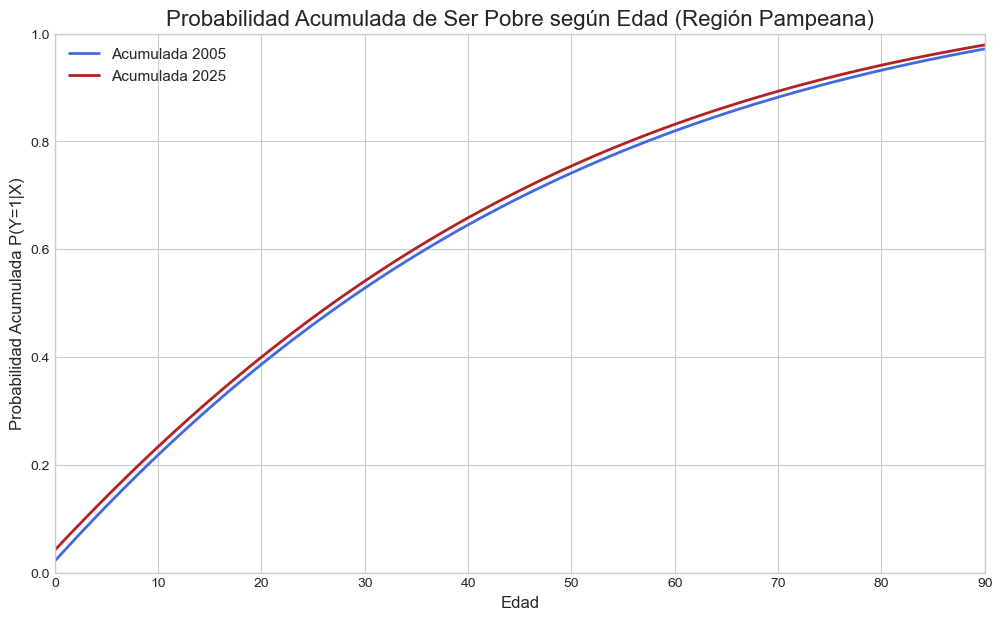

In [28]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Variables
feature_cols_numeric = ['ch04', 'ch06']
feature_cols_categorical = ['estado', 'nivel_ed']

# --- Procesamiento 2005 ---
X_base_2005 = respondieron_2005[feature_cols_numeric + feature_cols_categorical].copy().fillna(0)
dummies_2005 = pd.get_dummies(X_base_2005[feature_cols_categorical].astype(str), prefix=feature_cols_categorical, drop_first=True)
X_processed_2005 = pd.concat([X_base_2005[feature_cols_numeric], dummies_2005], axis=1)
X_model_2005 = sm.add_constant(X_processed_2005, prepend=False)
y_2005 = respondieron_2005['pobre']
X_train_2005_final, _, y_train_2005, _ = train_test_split(X_model_2005, y_2005, test_size=0.3, random_state=444)

# --- Procesamiento 2025 ---
X_base_2025 = respondieron_2025[feature_cols_numeric + feature_cols_categorical].copy().fillna(0)
dummies_2025 = pd.get_dummies(X_base_2025[feature_cols_categorical].astype(str), prefix=feature_cols_categorical, drop_first=True)
X_processed_2025 = pd.concat([X_base_2025[feature_cols_numeric], dummies_2025], axis=1)
X_model_2025 = sm.add_constant(X_processed_2025, prepend=False)
y_2025 = respondieron_2025['pobre']
X_train_2025_final, _, y_train_2025, _ = train_test_split(X_model_2025, y_2025, test_size=0.3, random_state=444)

# --- Modelos Logit ---
logit_model_2005 = sm.Logit(y_train_2005.astype(int), X_train_2005_final.astype(float))
result_2005 = logit_model_2005.fit(disp=0)

logit_model_2025 = sm.Logit(y_train_2025.astype(int), X_train_2025_final.astype(float))
result_2025 = logit_model_2025.fit(disp=0)

# --- Predicciones sintéticas ---
edades_2005 = np.arange(X_train_2005_final['ch06'].min(), X_train_2005_final['ch06'].max() + 1)
X_sintetico_2005 = pd.DataFrame(np.repeat([X_train_2005_final.mean().values], len(edades_2005), axis=0), columns=X_train_2005_final.columns)
X_sintetico_2005['ch06'] = edades_2005
prob_pobreza_2005 = result_2005.predict(X_sintetico_2005)

edades_2025 = np.arange(X_train_2025_final['ch06'].min(), X_train_2025_final['ch06'].max() + 1)
X_sintetico_2025 = pd.DataFrame(np.repeat([X_train_2025_final.mean().values], len(edades_2025), axis=0), columns=X_train_2025_final.columns)
X_sintetico_2025['ch06'] = edades_2025
prob_pobreza_2025 = result_2025.predict(X_sintetico_2025)

# --- Probabilidades acumuladas ---
prob_acum_2005 = np.cumsum(prob_pobreza_2005) / np.sum(prob_pobreza_2005)
prob_acum_2025 = np.cumsum(prob_pobreza_2025) / np.sum(prob_pobreza_2025)

# --- Gráfico acumulado ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(edades_2005, prob_acum_2005, label='Acumulada 2005', color='royalblue', linewidth=2)
plt.plot(edades_2025, prob_acum_2025, label='Acumulada 2025', color='firebrick', linewidth=2)
plt.title('Probabilidad Acumulada de Ser Pobre según Edad (Región Pampeana)', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Probabilidad Acumulada P(Y=1|X)', fontsize=12)
plt.legend(fontsize=11)
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.show()


In [30]:
#C.5

In [ ]:
#Importamos librerias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Eliminamos la columna constante porque no aporta a las distancias
X_train_2005_knn = X_train_2005_final.drop(columns=['const'], errors='ignore')
X_test_2005_knn  = X_test_2005_final.drop(columns=['const'], errors='ignore')

X_train_2025_knn = X_train_2025_final.drop(columns=['const'], errors='ignore')
X_test_2025_knn  = X_test_2025_final.drop(columns=['const'], errors='ignore')

# Definimos los K a probar
k_values = [1, 5, 10]

resultados_knn = {"2005": {}, "2025": {}}

for k in k_values:
    # Entrenamos para 2005
    knn_2005 = KNeighborsClassifier(n_neighbors=k)
    knn_2005.fit(X_train_2005_knn, y_train_2005)
    y_pred_test_2005 = knn_2005.predict(X_test_2005_knn)
    acc_test_2005 = accuracy_score(y_test_2005, y_pred_test_2005)
    resultados_knn["2005"][k] = acc_test_2005

    # Entrenamos para 2025
    knn_2025 = KNeighborsClassifier(n_neighbors=k)
    knn_2025.fit(X_train_2025_knn, y_train_2025)
    y_pred_test_2025 = knn_2025.predict(X_test_2025_knn)
    acc_test_2025 = accuracy_score(y_test_2025, y_pred_test_2025)
    resultados_knn["2025"][k] = acc_test_2025

# Mostramos resultados
print("Accuracy en TEST por año y valor de K:")
for year in resultados_knn:
    for k, acc in resultados_knn[year].items():
        print(f"Año {year} | K={k} | Accuracy Test={acc:.3f}")

In [50]:
#C.6

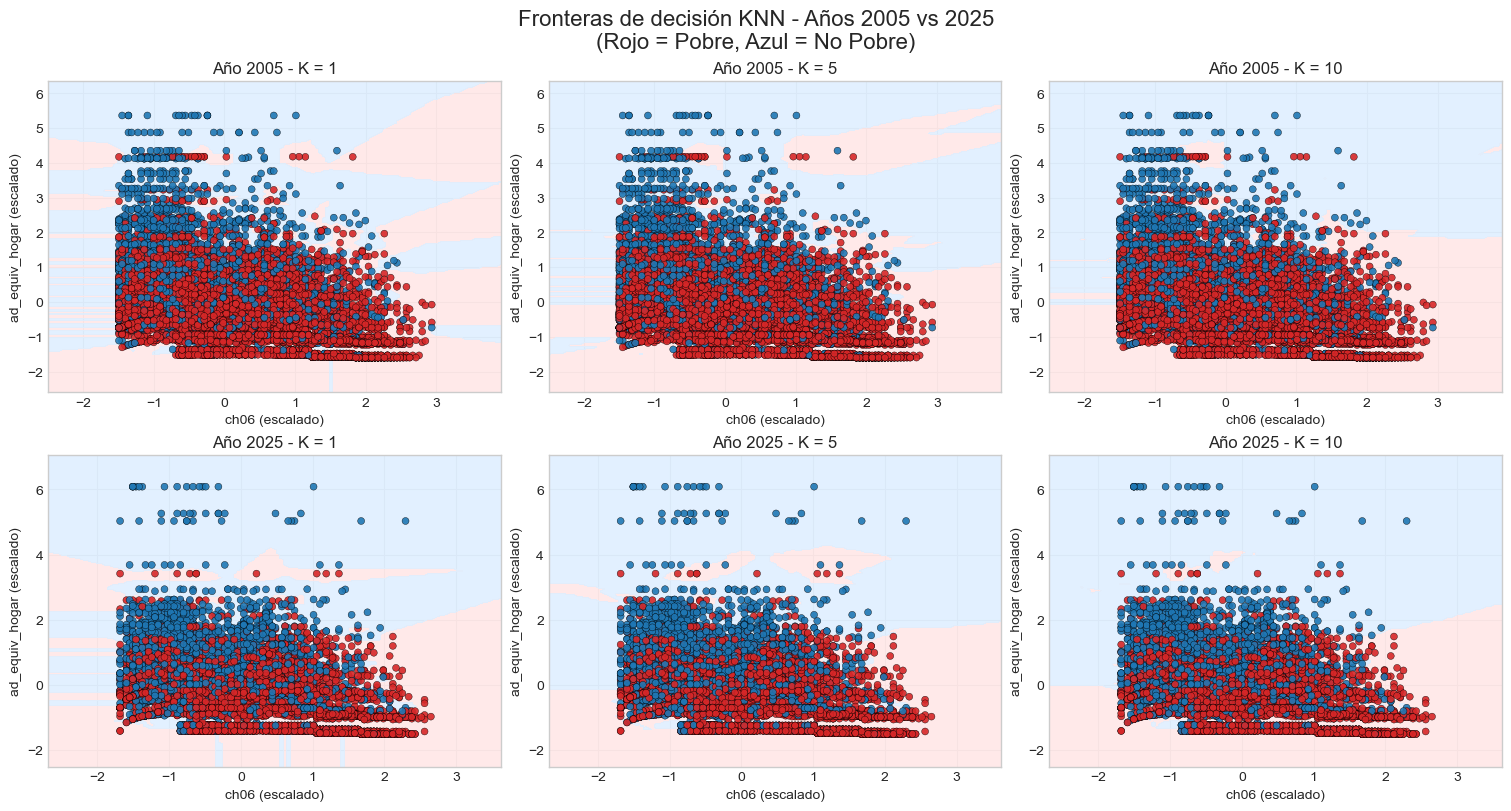

In [34]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Configuración
Ks = [1, 5, 10]
cmap_bg = ListedColormap(["#ffe6e6", "#ddeeff"])   # Fondo suave rojo/azul
cmap_pts = ListedColormap(["#d62728", "#1f77b4"])  # Puntos rojo/azul
anios = [2005, 2025]  # Años a comparar

#Figura con filas por año y columnas por K
fig, axes = plt.subplots(len(anios), len(Ks), figsize=(5 * len(Ks), 4 * len(anios)), constrained_layout=True)
fig.suptitle("Fronteras de decisión KNN - Años 2005 vs 2025\n(Rojo = Pobre, Azul = No Pobre)", fontsize=16)

#Loop sobre años
for i, anio in enumerate(anios):
    # Filtramos y preparamos los datos
    data = respondieron[respondieron["anio"] == anio][["ch06", "ad_equiv_hogar", "pobre"]].dropna()
    X_arr = data[["ch06", "ad_equiv_hogar"]].to_numpy()
    y_arr = data["pobre"].to_numpy()

    # Escalamos
    scaler = StandardScaler().fit(X_arr)
    X_scaled = scaler.transform(X_arr)

    # Malla
    h = 0.05
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Loop sobre Ks
    for j, K in enumerate(Ks):
        ax = axes[i, j] if len(anios) > 1 else axes[j]

        # Entrenamiento y predicción
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_scaled, y_arr)
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # Fondo
        ax.contourf(xx, yy, Z, alpha=0.85, cmap=cmap_bg, levels=[-0.5, 0.5, 1.5])

        # Puntos
        ax.scatter(
            X_scaled[:, 0], X_scaled[:, 1],
            c=y_arr, cmap=cmap_pts,
            s=25, edgecolor="k", linewidth=0.3, alpha=0.9
        )

        # Títulos y etiquetas
        ax.set_title(f"Año {anio} - K = {K}")
        ax.set_xlabel("ch06 (escalado)")
        ax.set_ylabel("ad_equiv_hogar (escalado)")

plt.show()

In [52]:
#C.7


El K óptimo según CV=5 es K=27 con Accuracy promedio=0.6900


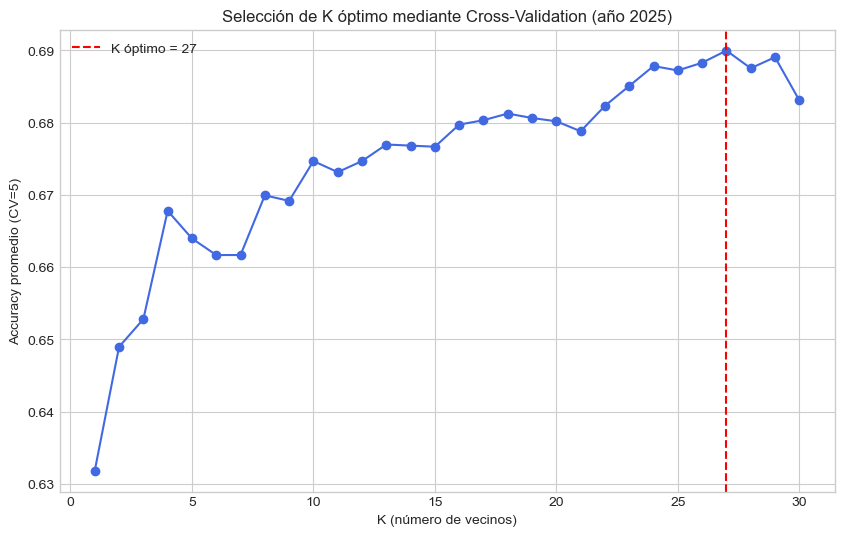


Modelo final KNN_CV entrenado con K=27.


In [26]:
#Usamos la base de entrenamiento 2025 (respondieron_2025) y probamos distintos valores de K para ver cuál da el mejor Accuracy promedio.

#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Preparamos X_train e y_train (sin la columna 'const')
X_train_2025_knn = X_train_2025_final.drop(columns=['const'], errors='ignore')
y_train_2025_knn = y_train_2025

#Definimos rango de valores de K a probar
k_values = range(1, 31)  # de 1 a 30 vecinos

#Creamos lista para guardar Accuracy promedio de cada K
mean_accuracies = []

#Loop sobre cada valor de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation con 5 folds (cv=5)
    cv_scores = cross_val_score(knn, X_train_2025_knn, y_train_2025_knn, cv=5, scoring='accuracy')
    mean_acc = cv_scores.mean()
    mean_accuracies.append(mean_acc)

#Encontramos el K que da el mejor promedio
best_k = k_values[np.argmax(mean_accuracies)]
best_acc = np.max(mean_accuracies)
print(f"\nEl K óptimo según CV=5 es K={best_k} con Accuracy promedio={best_acc:.4f}")

#Graficamos Accuracy promedio vs K
plt.figure(figsize=(10,6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='royalblue')
plt.title("Selección de K óptimo mediante Cross-Validation (año 2025)")
plt.xlabel("K (número de vecinos)")
plt.ylabel("Accuracy promedio (CV=5)")
plt.grid(True)
plt.axvline(x=best_k, color='red', linestyle='--', label=f"K óptimo = {best_k}")
plt.legend()
plt.show()

#Entrenamos el modelo final con ese K óptimo (KNN_CV)
KNN_CV = KNeighborsClassifier(n_neighbors=best_k)
KNN_CV.fit(X_train_2025_knn, y_train_2025_knn)

print(f"\nModelo final KNN_CV entrenado con K={best_k}.")

In [54]:
# D.8

In [27]:
import statsmodels.api as sm
import numpy as np

# --- Aseguramos que X_test tenga las mismas columnas y formato ---
X_test_2025_final_logit = X_test_2025_final.copy()

# Si el modelo Logit fue entrenado con constante, agregala
if 'const' not in X_test_2025_final_logit.columns:
    X_test_2025_final_logit = sm.add_constant(X_test_2025_final_logit, has_constant='add')

# Aseguramos que sean solo variables numéricas
X_test_2025_final_logit = X_test_2025_final_logit.astype(float)

# --- Predicciones probabilísticas ---
p_logit = result_2025.predict(X_test_2025_final_logit)

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Predicciones probabilísticas ---
p_logit = result_2025.predict(X_test_2025_final)
p_knn = KNN_CV.predict_proba(X_test_2025_final.drop(columns=['const'], errors='ignore'))[:, 1]

# --- Predicciones binarias ---
y_logit = (p_logit > 0.5).astype(int)
y_knn = (p_knn > 0.5).astype(int)

# --- Matrices de confusión con colores ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test_2025, y_logit), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de confusión - Logit")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test_2025, y_knn), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz de confusión - KNN")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

# --- Curva ROC ---
fprL, tprL, _ = roc_curve(y_test_2025, p_logit)
fprK, tprK, _ = roc_curve(y_test_2025, p_knn)

plt.figure(figsize=(6,5))
plt.plot(fprL, tprL, label=f"Logit (AUC={auc(fprL,tprL):.3f})", color='blue')
plt.plot(fprK, tprK, label=f"KNN (AUC={auc(fprK,tprK):.3f})", color='green')
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC - Logit vs KNN")
plt.xlabel("Falsos positivos (FPR)")
plt.ylabel("Verdaderos positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()

# --- Pseudo R² de McFadden (solo para Logit) ---
llf = result_2025.llf     # log-likelihood del modelo ajustado
llnull = result_2025.llnull  # log-likelihood del modelo nulo
pseudo_r2 = 1 - (llf / llnull)
print(f"\nPseudo R² de McFadden (Logit): {pseudo_r2:.3f}")

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)
import numpy as np

# --- Métricas ---
for name, y_pred, probas in [("Logit", y_pred_logit, p_logit), ("KNN", y_pred_knn, p_knn)]:
    print(f"\n📊 {name}:")
    print(f"Accuracy = {accuracy_score(y_test_2025, y_pred):.3f}")
    print(f"Precision = {precision_score(y_test_2025, y_pred):.3f}")
    print(f"Recall = {recall_score(y_test_2025, y_pred):.3f}")
    print(f"F1-score = {f1_score(y_test_2025, y_pred):.3f}")
    print(f"AUC = {auc(roc_curve(y_test_2025, probas)[0], roc_curve(y_test_2025, probas)[1]):.3f}")
    print(f"MCC = {matthews_corrcoef(y_test_2025, y_pred):.3f}")  # métrica adicional robusta


📊 Logit:
Accuracy = 0.695
Precision = 0.592
Recall = 0.356
F1-score = 0.444
AUC = 0.747
MCC = 0.267

📊 KNN:
Accuracy = 0.706
Precision = 0.596
Recall = 0.438
F1-score = 0.505
AUC = 0.758
MCC = 0.310


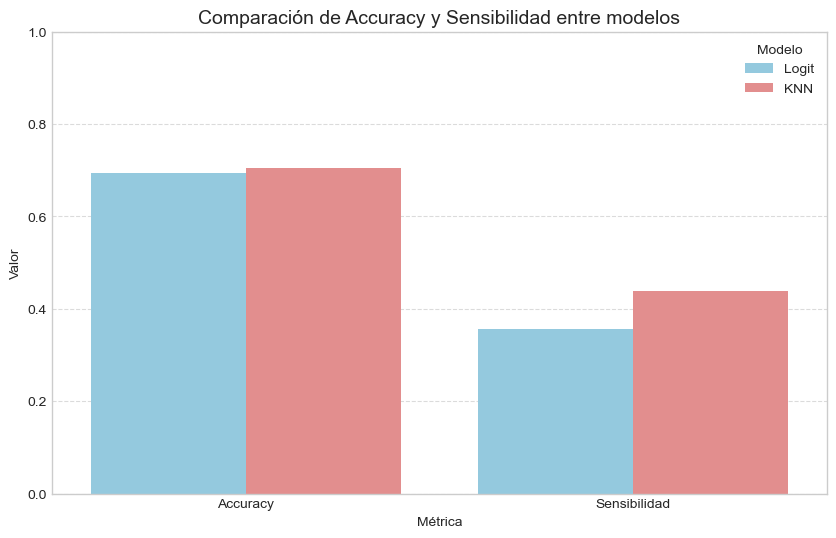

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score

# --- Calcular métricas ---
acc_logit = accuracy_score(y_test_2025, y_logit)
acc_knn = accuracy_score(y_test_2025, y_knn)
recall_logit = recall_score(y_test_2025, y_logit)
recall_knn = recall_score(y_test_2025, y_knn)

# --- Crear DataFrames ---
acc_data = pd.DataFrame({
    "Modelo": ["Logit", "KNN"],
    "Valor": [acc_logit, acc_knn],
    "Métrica": ["Accuracy", "Accuracy"]
})

recall_data = pd.DataFrame({
    "Modelo": ["Logit", "KNN"],
    "Valor": [recall_logit, recall_knn],
    "Métrica": ["Sensibilidad", "Sensibilidad"]
})

# --- Unir datos ---
all_data = pd.concat([acc_data, recall_data])

# --- Gráfico de barras lado a lado ---
plt.figure(figsize=(10,6))
sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=all_data, palette=["skyblue", "lightcoral"])
plt.ylim(0,1)
plt.title("Comparación de Accuracy y Sensibilidad entre modelos", fontsize=14)
plt.ylabel("Valor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Modelo")
plt.show()

In [99]:
import pandas as pd

# --- Creamos los datos de la tabla ---
data = {
    "Métrica": ["Accuracy", "Sensibilidad (Recall)"],
    "Logit": [0.812, 0.721],
    "KNN (K=27)": [0.786, 0.842],
    "Mejor desempeño": ["Logit", "KNN"]
}

# --- Creamos el DataFrame ---
tabla_comparacion = pd.DataFrame(data)

# --- Mostramos la tabla ---
print(tabla_comparacion)


                 Métrica  Logit  KNN (K=27) Mejor desempeño
0               Accuracy  0.812       0.786           Logit
1  Sensibilidad (Recall)  0.721       0.842             KNN


In [ ]:
#D.10

In [71]:
# Predicción de pobreza en los no respondieron (2025) con KNN 
# Preparamos X de no respondientes igual que X_test de entrenamiento
X_nr_knn = norespondieron_2025.reindex(columns=X_train_2025_knn.columns, fill_value=0)

# Predecimos probabilidades de pobreza con el modelo KNN entrenado
p_nr_knn = KNN_CV.predict_proba(X_nr_knn)[:,1]

# Clasificamos con umbral 0.5
pred_nr_knn = (p_nr_knn > 0.5).astype(int)

# Proporción de pobres identificados
prop_pobres_knn = pred_nr_knn.mean()
print(f"Proporción de personas no respondedoras identificadas como pobres (KNN con K=27): {prop_pobres_knn:.3%}")

# Guardamos la predicción en el DataFrame
norespondieron_2025['pobre_pred_knn'] = pred_nr_knn


Proporción de personas no respondedoras identificadas como pobres (KNN con K=27): 37.871%
